In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path

folder_path = "api/data_readout"
file_type = '\*csv'
files = glob.glob(folder_path + file_type)
max_file = max(files, key=os.path.getctime)

data = pd.read_csv(max_file)
# time can go negative if time runs out, so clean data to reflect 0 = no time left
data['time'] = data['time'].apply(lambda x: 0 if x < 0 else x)
data.head()

,kills,time,health,score,movement,rotate,shoot,reward
0,2,0,100,145.327194,72,76,20,-2016
1,1,0,100,96.572708,65,77,24,-5504
2,2,0,100,163.645248,60,84,25,-2516
3,1,0,100,95.106354,66,78,24,-5500
4,1,0,100,97.078110,56,92,20,-4512


# Summary Plots
The plots below provide an overview to the models performance during the last training session. It will show a graph for the collected statistics with a graph of the score for easy viewing. Most of these are action counts, which may show correlations between certain actions resulting in a higher score.

In [34]:
plt.rcParams["figure.figsize"] = (20,5)
data.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,52.000000,52.0,52.0,52.000000,52.000000,52.00000,52.000000,52.000000
mean,0.673077,0.0,100.0,54.569985,71.192308,85.00000,20.557692,-4849.730769
std,0.879419,0.0,0.0,71.045661,25.903318,22.87648,6.610786,2038.589633
min,0.000000,0.0,100.0,0.000000,49.000000,55.00000,8.000000,-8020.000000
25%,0.000000,0.0,100.0,0.000000,62.000000,75.00000,18.000000,-6341.500000
50%,0.000000,0.0,100.0,0.000000,67.000000,81.50000,19.500000,-5008.000000
75%,1.000000,0.0,100.0,91.955173,73.000000,85.50000,23.000000,-3768.000000
max,3.000000,0.0,100.0,250.181213,230.000000,217.00000,52.000000,1722.000000


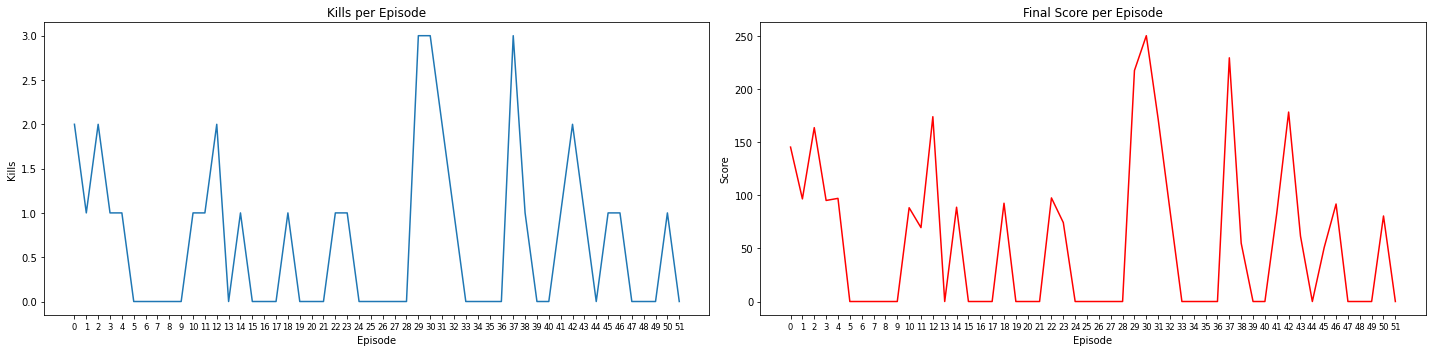

In [35]:
plt.subplot(1, 2, 1)
plt.title("Kills per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Kills')
plt.xlabel('Episode')
plt.plot(data.index, data['kills'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.xticks(range(len(data.index)), data.index, size='small')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

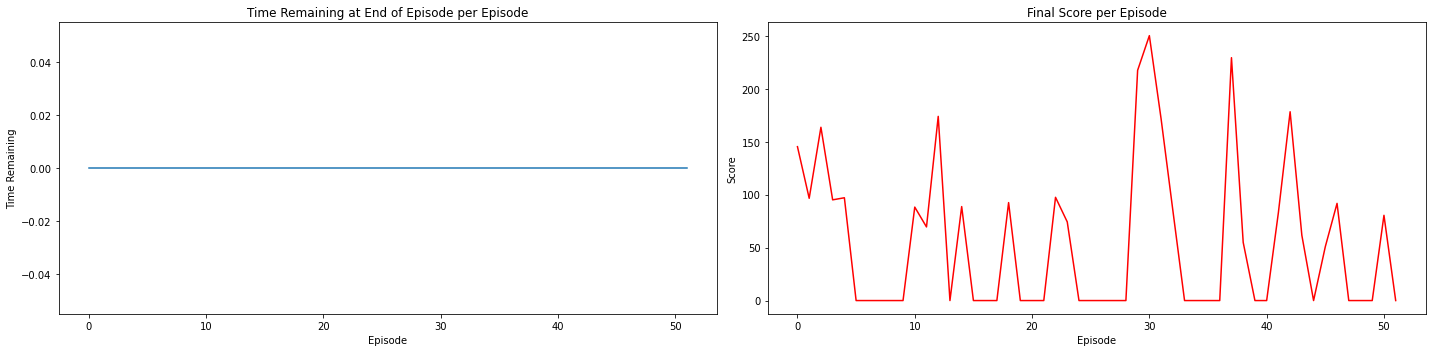

In [36]:
plt.subplot(1, 2, 1)
plt.title("Time Remaining at End of Episode per Episode")
plt.ylabel('Time Remaining')
plt.xlabel('Episode')
plt.plot(data.index, data['time'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

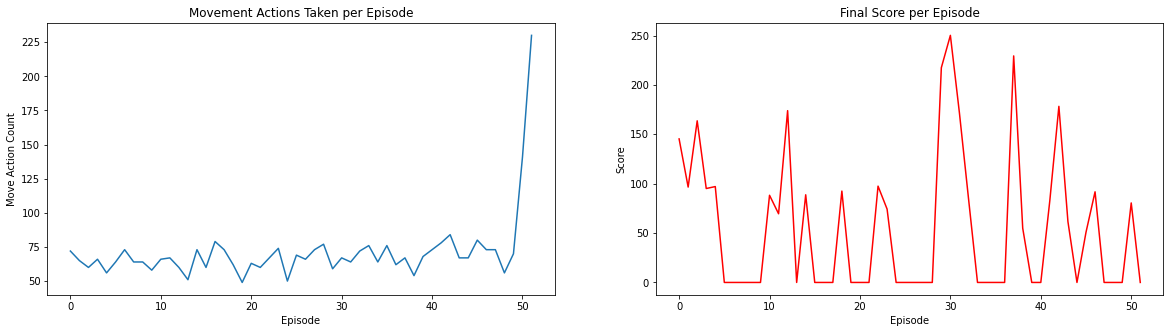

In [37]:
plt.subplot(1, 2, 1)
plt.title("Movement Actions Taken per Episode")
plt.ylabel('Move Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['movement'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

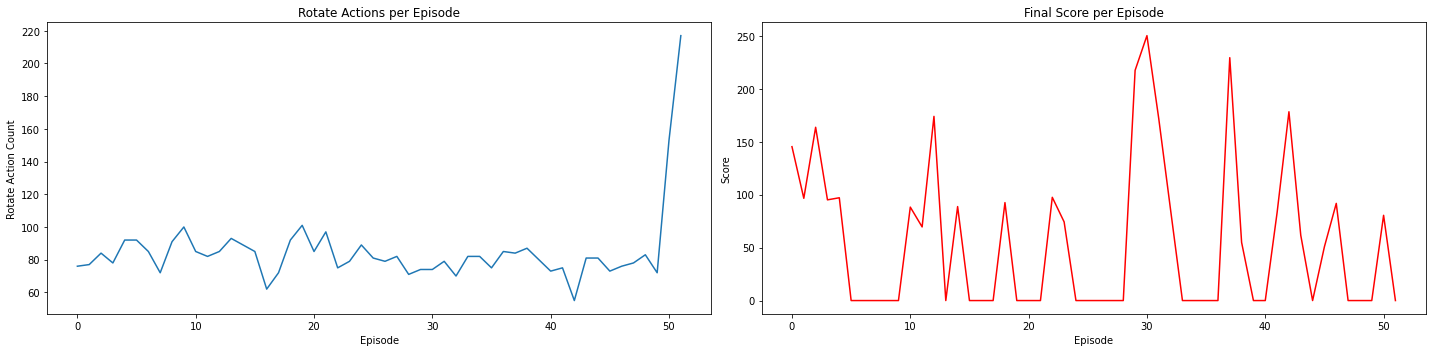

In [38]:
plt.subplot(1, 2, 1)
plt.title("Rotate Actions per Episode")
plt.ylabel('Rotate Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['rotate'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

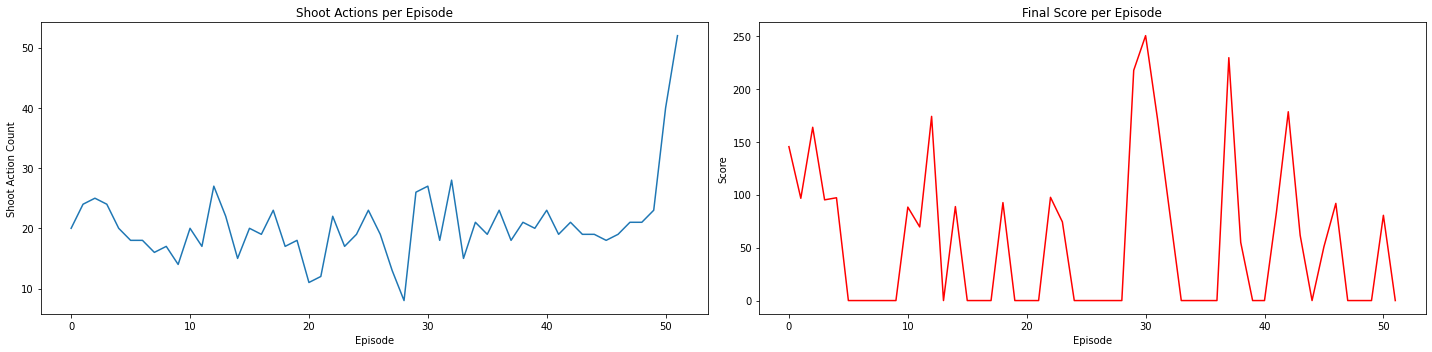

In [39]:
plt.subplot(1, 2, 1)
plt.title("Shoot Actions per Episode")
plt.ylabel('Shoot Action Count')
plt.xlabel('Episode')
plt.plot(data.index, data['shoot'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

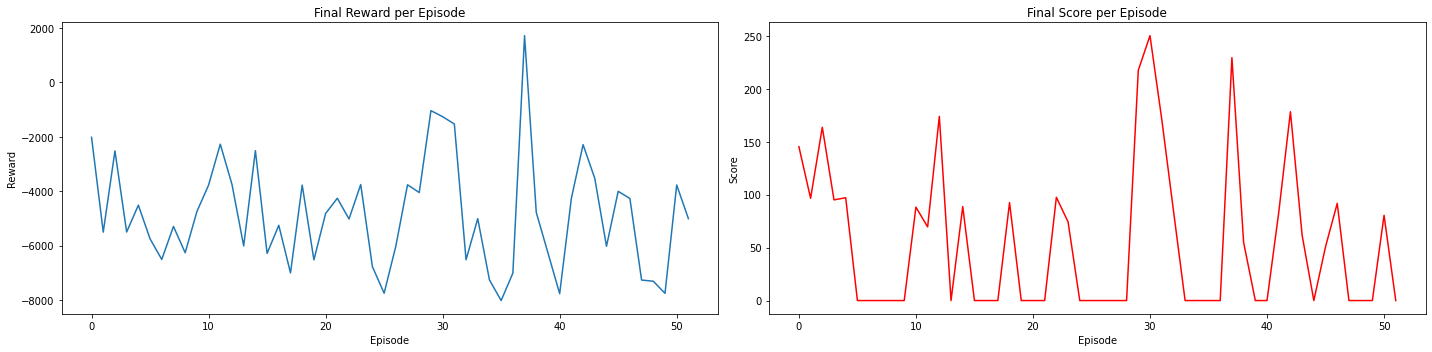

In [40]:
plt.subplot(1, 2, 1)
plt.title("Final Reward per Episode")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.plot(data.index, data['reward'])

plt.subplot(1, 2, 2)
plt.title("Final Score per Episode")
plt.ylabel('Score')
plt.xlabel('Episode')
plt.plot(data.index, data['score'], color='red')

plt.tight_layout()
plt.show()

# Positive Score Plots
There are many episodes where no score is achieved. To better analyze the results we will isolate episodes where a score was gained and then graph it against score. This will allow us to isolate any actions that may potentially be leading to higher scores.

In [41]:
df_score = data.loc[data['score'] > 0].sort_values('score').reset_index(drop=True)
df_score.head()
print("% of episodes where score was achieved: " + str(df_score.size/data.size))

% of episodes where score was achieved: 0.46153846153846156


In [42]:
df_score.describe()

,kills,time,health,score,movement,rotate,shoot,reward
count,24.000000,24.0,24.0,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.458333,0.0,100.0,118.234968,70.583333,82.291667,21.750000,-3350.500000
std,0.721060,0.0,0.0,57.771489,16.693963,17.005061,5.334465,1778.339553
min,1.000000,0.0,100.0,50.888950,54.000000,55.000000,15.000000,-6520.000000
25%,1.000000,0.0,100.0,82.441196,63.500000,75.000000,18.000000,-4327.500000
50%,1.000000,0.0,100.0,93.804855,67.000000,79.000000,20.000000,-3762.000000
75%,2.000000,0.0,100.0,165.644672,73.000000,85.000000,24.250000,-2282.000000
max,3.000000,0.0,100.0,250.181213,141.000000,153.000000,40.000000,1722.000000


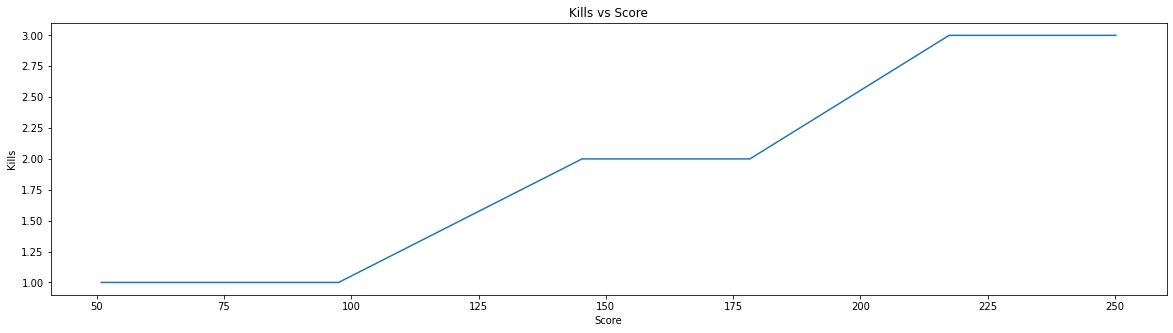

In [43]:
plt.title("Kills vs Score")
plt.ylabel('Kills')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['kills'])

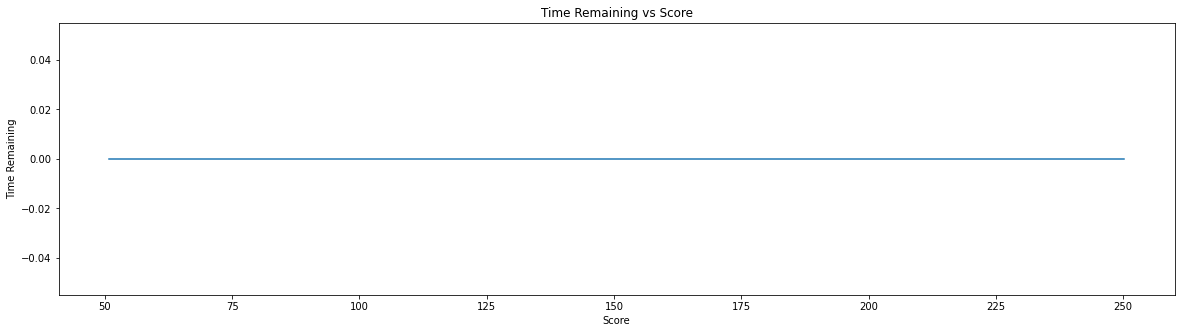

In [44]:
plt.title("Time Remaining vs Score")
plt.ylabel('Time Remaining')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['time'])

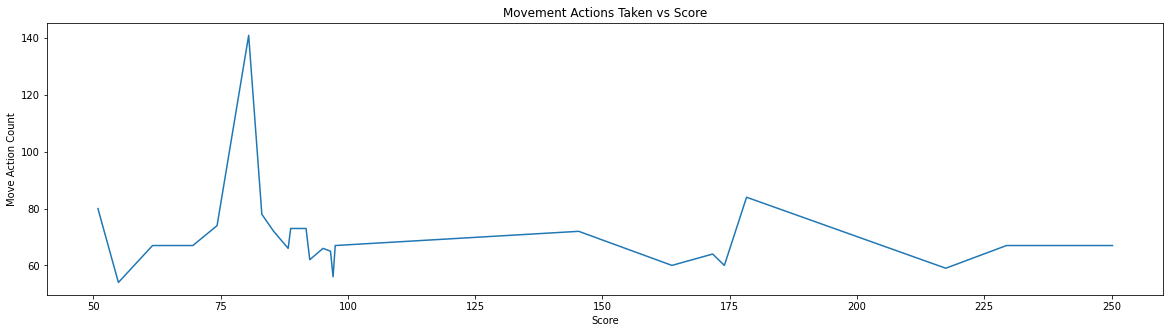

In [45]:
plt.title("Movement Actions Taken vs Score")
plt.ylabel('Move Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['movement'])

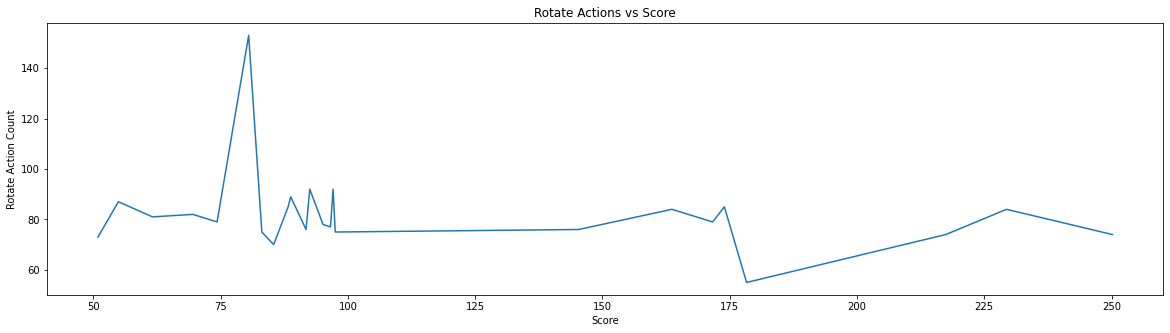

In [46]:
plt.title("Rotate Actions vs Score")
plt.ylabel('Rotate Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['rotate'])

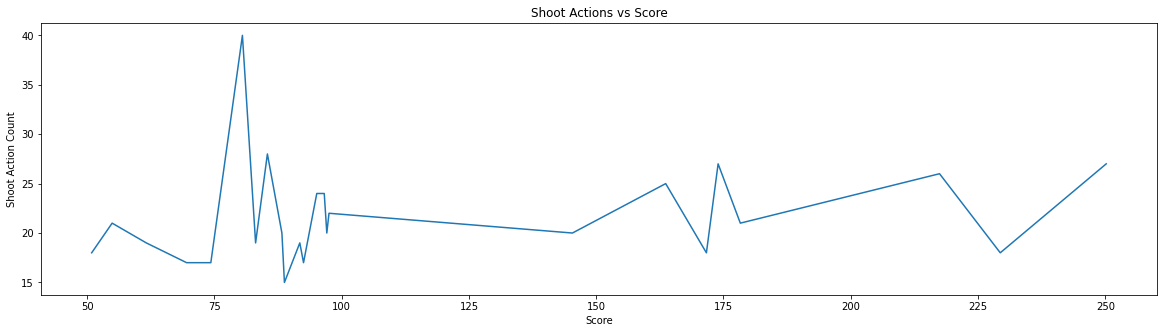

In [47]:
plt.title("Shoot Actions vs Score")
plt.ylabel('Shoot Action Count')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['shoot'])

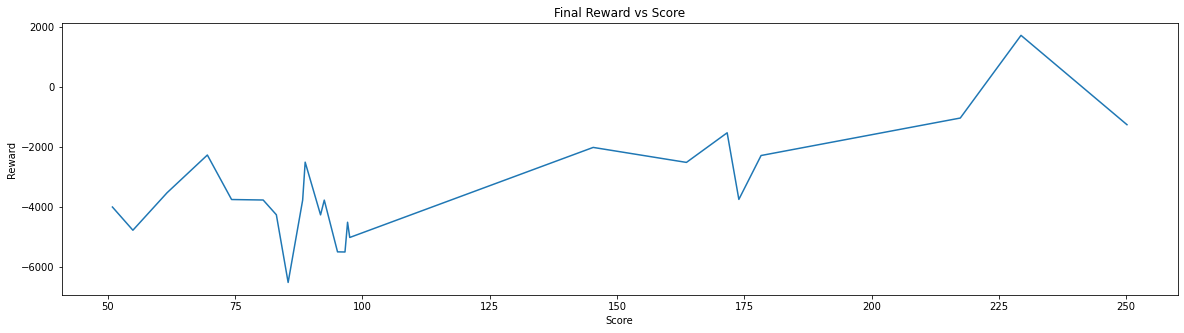

In [48]:
plt.title("Final Reward vs Score")
plt.ylabel('Reward')
plt.xlabel('Score')
plt.plot(df_score['score'], df_score['reward'])